# Shape analysis of curves with the Square Root Velocity metric

Lead author: Alice Le Brigant.

In this notebook, we demonstrate how to compute distances between curves in a way that does not depend on parametrization, i.e. that only depends on the shapes of the curves. This is achieved using the Square Root Velocity metric (see [SKJJ2011](#References)) on the space of parametrized curves, and by quotienting out the action of reparametrization through an optimal matching algorithm (see [LAB2017](#References)). We will use the [`discrete_curves.py`](https://github.com/geomstats/geomstats/blob/master/geomstats/geometry/discrete_curves.py) module. Translation and rotation can also be quotiented out using the `align` method of the [`pre-shape.py`](https://github.com/geomstats/geomstats/blob/master/geomstats/geometry/pre_shape.py) module, but we will not deal with these aspects here. See this [usecase](https://github.com/geomstats/geomstats/blob/master/notebooks/usecase_optic_nerve_heads_analysis_in_kendall_shape_space.ipynb) for details on the `pre_shape.py` module, or this  [other usecase](https://github.com/geomstats/challenge-iclr-2021/blob/main/Florent-Michel__Shape-Analysis-of-Cancer-Cells/submission_cell_shape_analysis.ipynb) for an application where both modules are used.

## Setup

In [1]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(geomstats_gitroot_path[:-1])

print("Working directory: ", os.getcwd())

Working directory:  /home/abdellaoui/geomstats


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.discrete_curves import DiscreteCurves

INFO: Using numpy backend


## Example 1: plane curves

We start with a basic example in $\mathbb R^2$. 

In [3]:
r2 = Euclidean(dim=2)
curves_r2 = DiscreteCurves(ambient_manifold=r2,a=1,b=1/2)

parametrized_curve_a = lambda x: gs.transpose(
    gs.array([1 + 2 * gs.sin(gs.pi * x), 3 + 2 * gs.cos(gs.pi * x)])
)
parametrized_curve_b = lambda x: gs.transpose(
    gs.array([5 * gs.ones(len(x)), 4 * (1 - x) + 1])
)

In practice, we work with discrete curves, i.e. sample points from the parametrized curves. 

False


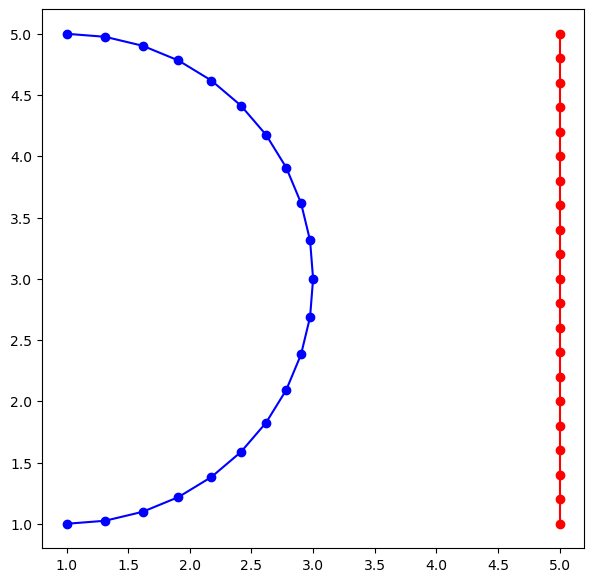

In [4]:
k_sampling_points = 20
sampling_points = gs.linspace(0.0, 1.0, k_sampling_points + 1)
curve_a = parametrized_curve_a(sampling_points)
curve_b = parametrized_curve_b(sampling_points)
print(curves_r2.belongs(curve_a))

plt.figure(figsize=(7, 7))
plt.plot(curve_a[:, 0], curve_a[:, 1], "o-b")
plt.plot(curve_b[:, 0], curve_b[:, 1], "o-r")
plt.show()

### Distance between parametrized curves

The metric we use to compare parametrized curves is the so-called Square Root Velocity metric, that computes an $L^2$ distance between the velocities of the curves, suitably renormalized to get reparametrization invariance. See [SKJJ2011](#References) for more details.

In [5]:
dist_srv = curves_r2.srv_metric.dist(point_a=curve_a, point_b=curve_b)
print("The distance of the SRV metric is equal {}".format(dist_srv))
dist_elastic = curves_r2.elastic_metric.dist(point_a=curve_a, point_b=curve_b)
print("The distance of the elastic metric (a = {}, b = {}) is equal to {}".format(curves_r2.elastic_metric.a, curves_r2.elastic_metric.b, dist_elastic))

The distance of the SRV metric is equal 1.9724017046021989
The distance of the elastic metric (a = 1, b = 0.5) is equal to 1.9724017046022007


The distance, as any riemannian distance, is computed as the length of the geodesic.

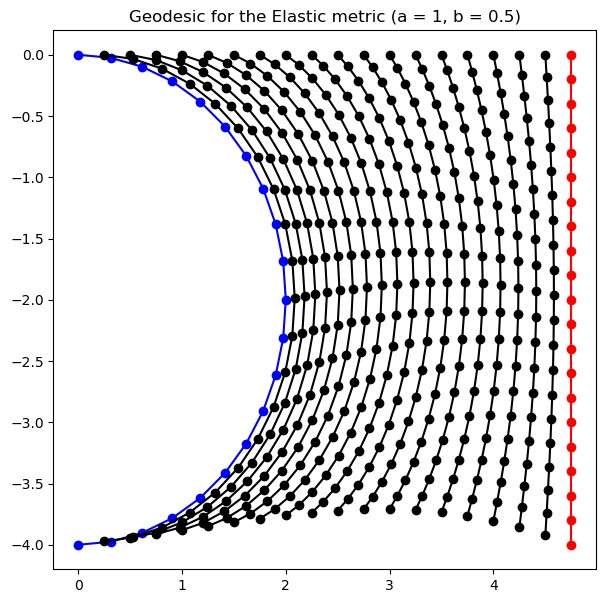

In [6]:
geod_fun = curves_r2.elastic_metric.geodesic(curve_a, curve_b)

n_times = 20
times = gs.linspace(0.0, 1.0, n_times)
geod = geod_fun(times)

for i in range(n_times):
    k = i*(5/n_times)
    geod[i,:,0] = geod[i,:,0] + k

plt.figure(figsize=(7, 7))
plt.plot(geod[0, :, 0], geod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    plt.plot(geod[i, :, 0], geod[i, :, 1], "o-k")
plt.plot(geod[-1, :, 0], geod[-1, :, 1], "o-r")
plt.title("Geodesic for the Elastic metric (a = {}, b = {})".format(curves_r2.elastic_metric.a, curves_r2.elastic_metric.b))
plt.show()

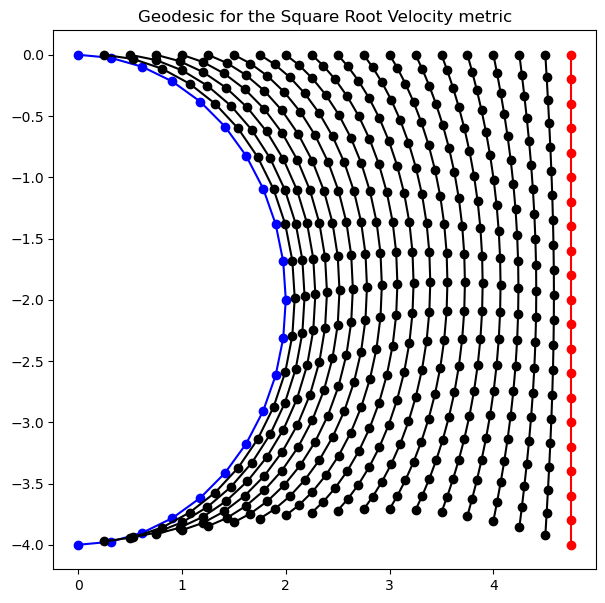

In [7]:
geod_fun = curves_r2.srv_metric.geodesic(curve_a, curve_b)

n_times = 20
times = gs.linspace(0.0, 1.0, n_times)
geod = geod_fun(times)

for i in range(n_times):
    k = i*(5/n_times)
    geod[i,:,0] = geod[i,:,0] + k

plt.figure(figsize=(7, 7))
plt.plot(geod[0, :, 0], geod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    plt.plot(geod[i, :, 0], geod[i, :, 1], "o-k")
plt.plot(geod[-1, :, 0], geod[-1, :, 1], "o-r")
plt.title("Geodesic for the Square Root Velocity metric")
plt.show()

The Square Root Velocity metric is reparametrization invariant in the sense that, if the two curves are reparametrized *in the same way*, the distance does not change.

In [8]:
curve_a_resampled = parametrized_curve_a(sampling_points**2)
curve_b_resampled = parametrized_curve_b(sampling_points**2)

dist_srv = curves_r2.srv_metric.dist(point_a=curve_a_resampled, point_b=curve_b_resampled)
print("The distance of the SRV metric is equal {}".format(dist_srv))
dist_elastic = curves_r2.elastic_metric.dist(point_a=curve_a_resampled, point_b=curve_b_resampled)
print("The distance of the elastic metric (a = {}, b = {}) is equal to {}".format(curves_r2.elastic_metric.a, curves_r2.elastic_metric.b, dist_elastic))

The distance of the SRV metric is equal 1.9699350203524333
The distance of the elastic metric (a = 1, b = 0.5) is equal to 1.9699350203524333


The geodesic keeps the same shape.

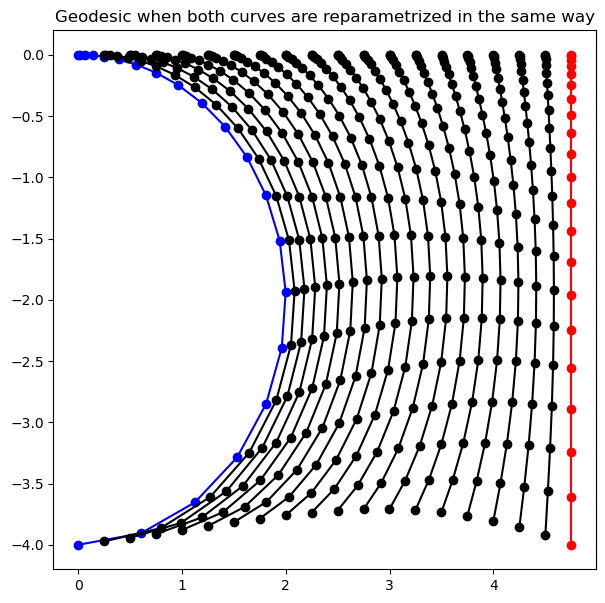

In [9]:
geod_fun_1 = curves_r2.elastic_metric.geodesic(
    curve_a_resampled, curve_b_resampled
)
geod_1 = geod_fun_1(times)
for i in range(n_times):
    k = i*(5/n_times)
    geod_1[i,:,0] = geod_1[i,:,0] + k

plt.figure(figsize=(7, 7))
plt.plot(geod_1[0, :, 0], geod_1[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    plt.plot(geod_1[i, :, 0], geod_1[i, :, 1], "o-k")
plt.plot(geod_1[-1, :, 0], geod_1[-1, :, 1], "o-r")
plt.title("Geodesic when both curves are reparametrized in the same way")
plt.show()

However, if the curves are reparametrized in *different* ways, the distance changes, and so does the shape of the geodesic.

In [10]:
curves_r2.srv_metric.dist(curve_a, curve_b_resampled)
dist_srv = curves_r2.srv_metric.dist(point_a=curve_a, point_b=curve_b_resampled)
print("The distance of the SRV metric is equal {}".format(dist_srv))
dist_elastic = curves_r2.elastic_metric.dist(point_a=curve_a, point_b=curve_b_resampled)
print("The distance of the elastic metric (a = {}, b = {}) is equal to {}".format(curves_r2.elastic_metric.a, curves_r2.elastic_metric.b, dist_elastic))

The distance of the SRV metric is equal 2.0182588918288635
The distance of the elastic metric (a = 1, b = 0.5) is equal to 2.018258891828865


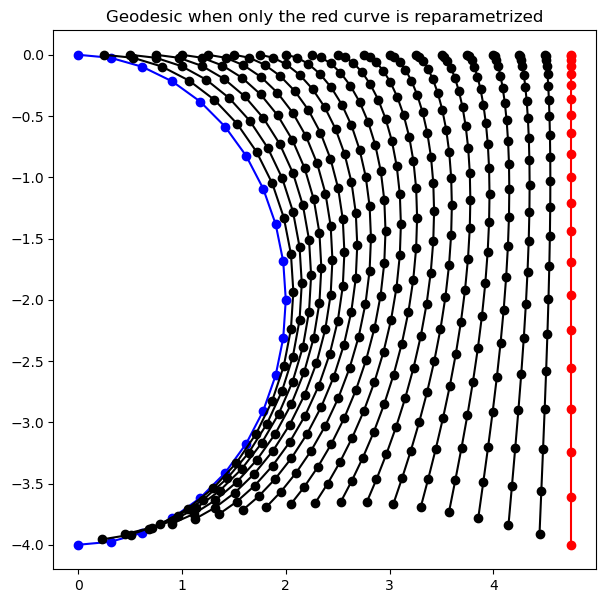

In [11]:
geod_fun_2 = curves_r2.elastic_metric.geodesic(curve_a, curve_b_resampled)
geod_2 = geod_fun_2(times)

for i in range(n_times):
    k = i*(5/n_times)
    geod_2[i,:,0] = geod_2[i,:,0] + k

plt.figure(figsize=(7, 7))
plt.plot(geod_2[0, :, 0], geod_2[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    plt.plot(geod_2[i, :, 0], geod_2[i, :, 1], "o-k")
plt.plot(geod_2[-1, :, 0], geod_2[-1, :, 1], "o-r")
plt.title("Geodesic when only the red curve is reparametrized")
plt.show()

### Distance between unparametrized curves

In order to completely quotient out parametrization, distances are computed in the base space of a fiber bundle where the fibers represent equivalent classes of curves with the same shape (i.e. equal modulo reparametrization). Any infinitesimal deformation of a curve can be split into the sum of vertical deformation (tangent to the fiber) that simply reparametrizes the curve without changing its shape, and a horizontal deformation (orthogonal to the fiber) that changes the shape. The distance between two unparametrized curves is then computed as the length of a horizontal geodesic linking their two fibers. 

In practice, to compute the horizontal geodesic linking the fibers of two discrete parametrized curves `curve_a` and `curve_b`, we can fix the parametrization of `curve_a`, and search for a reparametrization of `curve_b` (i.e. another discrete curve with same shape as `curve_b`) that best "matches" `curve_a`. 

Since geodesics that start with a horizontal velocity stay horizontal, a first idea would be the following: 

- compute the geodesic between `curve_a` and `curve_b`
- compute the horizontal part of its initial velocity vector
- shoot from `curve_a` using this horizontal vector.

In [12]:
from geomstats.geometry.discrete_curves import SRVShapeBundle

geod_velocity = n_times * (geod[1:] - geod[:-1])

srv_shape_bundle_r2 = SRVShapeBundle(r2)
geod_velocity_hor = srv_shape_bundle_r2.horizontal_projection(geod_velocity, geod[:-1])
geod_velocity_ver = srv_shape_bundle_r2.vertical_projection(geod_velocity, geod[:-1])

shooted_geod_fun = curves_r2.srv_metric.geodesic(
    initial_point=curve_a, initial_tangent_vec=geod_velocity_hor[0]
)
shooted_geod = shooted_geod_fun(times)

The problem with this idea is that, while it yields a horizontal geodesic starting at `curve_a`, its end point does not belong to the fiber of `curve_b`: as we cas see below, the end curve of the horizontal geodesic is not a reparametrization of the initial red curve, it does not have the same shape.

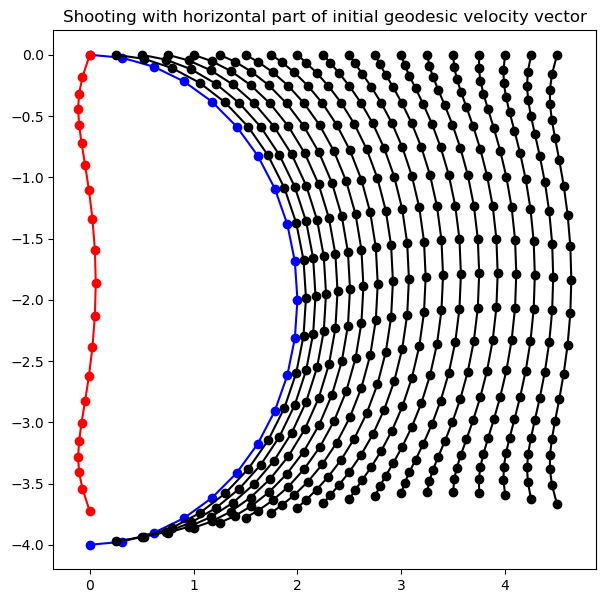

In [13]:
plt.figure(figsize=(7, 7))
plt.plot(shooted_geod[0, :, 0], shooted_geod[0, :, 1], "o-b")
plt.plot(shooted_geod[-1, :, 0], shooted_geod[-1, :, 1], "o-r")

for i in range(n_times):
    k = i*(5/n_times)
    shooted_geod[i,:,0] = shooted_geod[i,:,0] + k
    
for i in range(1, n_times - 1):
    plt.plot(shooted_geod[i, :, 0], shooted_geod[i, :, 1], "o-", c="k")
plt.title("Shooting with horizontal part of initial geodesic velocity vector")
plt.show()

To obtain a horizontal geodesic starting at `curve_a` and ending at a curve with same shape as `curve_b`, we use an iterative optimal matching algorithm [LAB2017](#References). This algorithm moves along the fiber of `curve_b` to find the best representative with respect to `curve_a` by iterating the following steps:

- step 1: compute the geodesic between `curve_a` and the current representative of `curve_b` (initially, `curve_b`)
- step 2: compute the path whose velocity is a reparametrization of the horizontal part of the geodesic velocity at all time, and set the new representative of `curve_b` to be the end point of this path.

Note that the first step yields a geodesic that is not horizontal, while the second step yields a horizontal path that is not geodesic. By iterating these two steps, the algorithm converges to a horizontal geodesic.

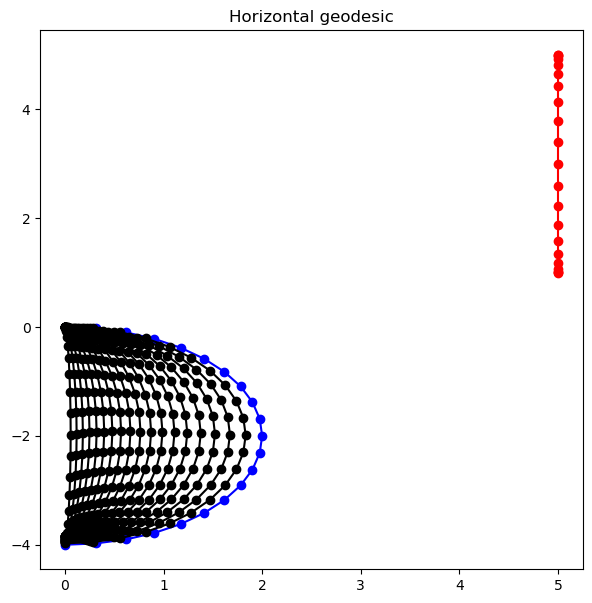

In [14]:
from geomstats.geometry.discrete_curves import SRVQuotientMetric

srv_quotient_metric_r2 = SRVQuotientMetric(r2)
hgeod_fun = srv_quotient_metric_r2.geodesic(curve_a, curve_b)
hgeod = hgeod_fun(times)

plt.figure(figsize=(7, 7))
plt.plot(hgeod[0, :, 0], hgeod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    plt.plot(hgeod[i, :, 0], hgeod[i, :, 1], "o-k")
plt.plot(hgeod[-1, :, 0], hgeod[-1, :, 1], "o-r")
plt.title("Horizontal geodesic")
plt.show()

We can check the horizontality of this geodesic by computing the norm of the vertical part of its velocity for all times.

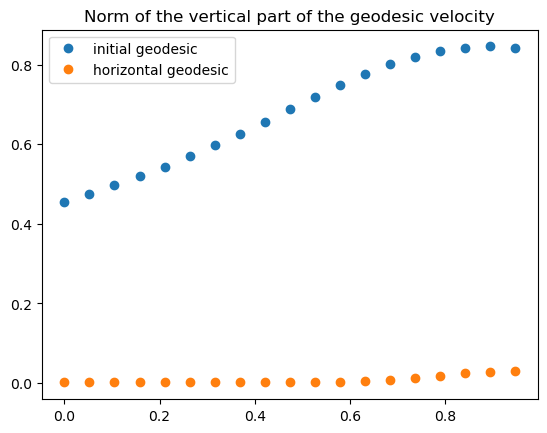

In [15]:
geod_vertical_norm = curves_r2.srv_metric.norm(
    geod_velocity_ver, geod[:-1]
)

hgeod_velocity = n_times * (hgeod[1:] - hgeod[:-1])
hgeod_velocity_ver = srv_shape_bundle_r2.vertical_projection(hgeod_velocity, hgeod[:-1])
hgeod_vertical_norm = curves_r2.srv_metric.norm(
    hgeod_velocity_ver, hgeod[:-1]
)

plt.figure()
plt.plot(times[:-1], geod_vertical_norm, "o", label="initial geodesic")
plt.plot(times[:-1], hgeod_vertical_norm, "o", label="horizontal geodesic")
plt.legend()
plt.title("Norm of the vertical part of the geodesic velocity")
plt.show()

We can also check that this horizontal geodesic does not change if we resample the end curve.

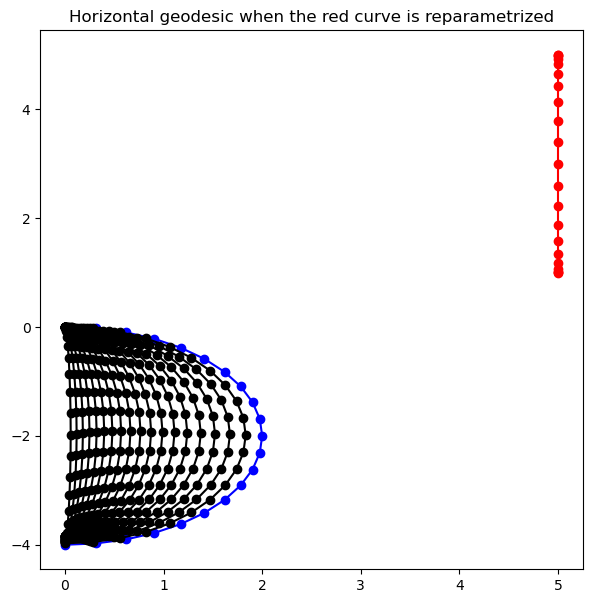

In [16]:
hgeod_fun = srv_quotient_metric_r2.geodesic(
    curve_a, curve_b_resampled
)
hgeod = hgeod_fun(times)

plt.figure(figsize=(7, 7))
plt.plot(hgeod[0, :, 0], hgeod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    plt.plot(hgeod[i, :, 0], hgeod[i, :, 1], "o-k")
plt.plot(hgeod[-1, :, 0], hgeod[-1, :, 1], "o-r")
plt.title("Horizontal geodesic when the red curve is reparametrized")
plt.show()

Finally, we can check that the quotient distance remains approximately constant for any parametrizations of the curves.

In [17]:
print(srv_quotient_metric_r2.dist(curve_a, curve_b))
print(srv_quotient_metric_r2.dist(curve_a_resampled, curve_b))
print(srv_quotient_metric_r2.dist(curve_a_resampled, curve_b_resampled))
print(srv_quotient_metric_r2.dist(curve_a, curve_b_resampled))

1.7188167388829796
1.7194946954725299
1.7188413741003459
1.7179253264094356


In [18]:
k_sampling_points = 20
sampling_points = gs.linspace(0.0, 1.0, k_sampling_points + 1)
curve_a = parametrized_curve_a(sampling_points)
curve_b = parametrized_curve_b(sampling_points)

In [19]:
curve_a_resampled = parametrized_curve_a(sampling_points**2)
curve_b_resampled = parametrized_curve_b(sampling_points**2)

In [20]:
print(srv_shape_bundle_r2.dist_dp(curve_a,curve_b,100,6))
print(srv_shape_bundle_r2.dist_dp(curve_a_resampled,curve_b,100,6))
print(srv_shape_bundle_r2.dist_dp(curve_a_resampled,curve_b_resampled,100,6))
print(srv_shape_bundle_r2.dist_dp(curve_a,curve_b_resampled,100,6))

le temps d'excecution est égal à 5.5415940284729 secondes
1.6432490668449087
le temps d'excecution est égal à 5.20407247543335 secondes
1.6645198894431075
le temps d'excecution est égal à 5.305152654647827 secondes
1.6372924671126128
le temps d'excecution est égal à 5.237194061279297 secondes
1.646875255978486


In [21]:
print(srv_shape_bundle_r2.dist_dp(curve_a,curve_b,100,10))
print(srv_shape_bundle_r2.dist_dp(curve_a_resampled,curve_b,100,10))
print(srv_shape_bundle_r2.dist_dp(curve_a_resampled,curve_b_resampled,100,10))
print(srv_shape_bundle_r2.dist_dp(curve_a,curve_b_resampled,100,10))

le temps d'excecution est égal à 19.68892550468445 secondes
1.63724659505377
le temps d'excecution est égal à 19.938958406448364 secondes
1.6496221927102226
le temps d'excecution est égal à 20.315593957901 secondes
1.6359702532338072
le temps d'excecution est égal à 25.60606098175049 secondes
1.639318659416964


In [22]:
dist_dp(curve_a,curve_b,100,100)

Mesures de temps de calcul
le temps d'excecution est égal à 4449.219846487045 secondes
le temps passé à calculer des integrales est égal à 4366.022861003876 secondes 
le nombre d'itération est égal à 24032152
le temps moyen d'une itération est égal à 0.00018167423628994507 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      3.9999999999999996               
 reparametrisée (optimale) :   3.9999999999999982               
 reparamétrisée (quelconque) : 3.9999999999999996 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.972525171470659               
 reparamétrisée (quelconque) : 4.94917913955198
Le produit scalaire maximum est égal à                                          3.1460032569813374
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.146003256981335
La distance est égale à 
(1.6372289569598946, 1.6372289569598955)



dist_dp(curve_a_resampled,curve_b,100,100)

Mesures de temps de calcul
le temps d'excecution est égal à 4091.307126760483 secondes
le temps passé à calculer des integrales est égal à 4016.428117990494 secondes 
le nombre d'itération est égal à 24032152
le temps moyen d'une itération est égal à 0.00016712727674119627 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      3.9999999999999996               
 reparametrisée (optimale) :   3.9999999999999996               
 reparamétrisée (quelconque) : 3.9999999999999996 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.9614862956962344               
 reparamétrisée (quelconque) : 4.917592191604587
Le produit scalaire maximum est égal à                                          3.140661159958672
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.1406611599586705
La distance est égale à 
(1.637120635682933, 1.637120635682934)



dist_dp(curve_a_resampled,curve_b_resampled,100,100)

Mesures de temps de calcul
le temps d'excecution est égal à 5384.811750411987 secondes
le temps passé à calculer des integrales est égal à 5275.344870090485 secondes 
le nombre d'itération est égal à 24032152
le temps moyen d'une itération est égal à 0.00021951196339347739 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      4.000000000000002               
 reparametrisée (optimale) :   3.962333333333334               
 reparamétrisée (quelconque) : 3.9519999999999986 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.9614862956962344               
 reparamétrisée (quelconque) : 4.917592191604587
Le produit scalaire maximum est égal à                                          3.1428426268111047
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.1278530056751235
La distance est égale à 
(1.6357875907568278, 1.6334361382310976)



dist_dp(curve_a,curve_b_resampled,100,100)

Mesures de temps de calcul
le temps d'excecution est égal à 3862.107563972473 secondes
le temps passé à calculer des integrales est égal à 3793.9048280715942 secondes 
le nombre d'itération est égal à 24032152
le temps moyen d'une itération est égal à 0.00015786787750308813 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      4.000000000000002               
 reparametrisée (optimale) :   3.9832190476190474               
 reparamétrisée (quelconque) : 3.9519999999999986 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.972525171470659               
 reparamétrisée (quelconque) : 4.94917913955198
Le produit scalaire maximum est égal à                                          3.1447611981086374
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.13820359877895
La distance est égale à 
(1.6379874160851744, 1.6368680525722914)

SyntaxError: invalid syntax (107739658.py, line 3)

In [ ]:
Resultats sans boucle while (100,10): 

Mesures de temps de calcul
le temps d'excecution est égal à 64.40713143348694 secondes
le temps passé à calculer des integrales est égal à 59.819655656814575 secondes 
le nombre d'itération est égal à 739756
le temps moyen d'une itération est égal à 8.086403578587341e-05 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      4.0               
 reparametrisée (optimale) :   4.0               
 reparamétrisée (quelconque) : 4.0 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.972525171470657               
 reparamétrisée (quelconque) : 4.9491791395519815
Le produit scalaire maximum est égal à                                          3.145974379227748
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.1459743792277477
La distance est égale à 
(1.6372465950537693, 1.6372465950537696)



Mesures de temps de calcul
le temps d'excecution est égal à 76.3796796798706 secondes
le temps passé à calculer des integrales est égal à 70.5470061302185 secondes 
le nombre d'itération est égal à 739756
le temps moyen d'une itération est égal à 9.536523682162566e-05 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      4.0               
 reparametrisée (optimale) :   4.0               
 reparamétrisée (quelconque) : 4.0 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.961486295696236               
 reparamétrisée (quelconque) : 4.9175921916045855
Le produit scalaire maximum est égal à                                          3.120116458507076
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.1201164585070758
La distance est égale à 
(1.6496221927102228, 1.6496221927102233)



Mesures de temps de calcul
le temps d'excecution est égal à 64.08518075942993 secondes
le temps passé à calculer des integrales est égal à 59.25697994232178 secondes 
le nombre d'itération est égal à 739756
le temps moyen d'une itération est égal à 8.010341239857707e-05 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      3.9999999999999996               
 reparametrisée (optimale) :   3.962333333333333               
 reparamétrisée (quelconque) : 3.9519999999999995 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.961486295696236               
 reparamétrisée (quelconque) : 4.9175921916045855
Le produit scalaire maximum est égal à                                          3.1425438131151746
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.1275541919791943
La distance est égale à 
(1.6359702532338072, 1.6336190636348429)



Mesures de temps de calcul
le temps d'excecution est égal à 66.47990560531616 secondes
le temps passé à calculer des integrales est égal à 61.44620871543884 secondes 
le nombre d'itération est égal à 739756
le temps moyen d'une itération est égal à 8.306280545942019e-05 secondes

Mesures d'invariance de reparametrisation
La norme au carré de la seconde courbe est égale à               
 sans reparamétrisation :      3.9999999999999996               
 reparametrisée (optimale) :   3.9683333333333324               
 reparamétrisée (quelconque) : 3.9519999999999995 
La norme au carré de la première courbe est égale à               
 sans paramétrisation :        4.972525171470657               
 reparamétrisée (quelconque) : 4.9491791395519815
Le produit scalaire maximum est égal à                                          3.1425797521790146
Le produit scalaire avec la seconde courbe reparametrisée (optimale) est égal à 3.1300118276981252
La distance est égale à 
(1.6393186594169629, 1.637325517240765)

## Example 2: 3D curves

Below we follow similar steps for curves in $\mathbb R^3$. In this example, we can see that the horizontal geodesic "straightens out" the original geodesic.

In [ ]:
r3 = Euclidean(dim=3)
curves_r3 = DiscreteCurves(ambient_manifold=r3)

parametrized_curve_a = lambda x: gs.transpose(
    gs.stack((gs.cos(2 + 8 * x), gs.sin(2 + 8 * x), 2 + 10 * x))
)
parametrized_curve_b = lambda x: gs.transpose(
    gs.stack((gs.cos(4 + 8 * x), gs.sin(4 + 8 * x), 2 + 10 * x))
)

k_sampling_points = 100
sampling_points = gs.linspace(0.0, 1.0, k_sampling_points)
curve_a_ = parametrized_curve_a(sampling_points)
curve_b_ = parametrized_curve_b(sampling_points)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], "b")
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], "r")
ax.scatter(curve_a[0, 0], curve_a[0, 1], curve_a[0, 2], "b")
ax.scatter(curve_b[0, 0], curve_b[0, 1], curve_b[0, 2], "r")
plt.show()

In [ ]:
geod_fun = curves_r3.srv_metric.geodesic(curve_a_, curve_b_)

n_times = 20
t = gs.linspace(0.0, 1.0, n_times)
geod = geod_fun(t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], "-", c="b", linewidth=2)
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], "-", c="r", linewidth=2)
for i in range(1, n_times - 1):
    ax.plot(geod[i, :, 0], geod[i, :, 1], geod[i, :, 2], "-", c="k")
for j in range(k_sampling_points):
    ax.plot(geod[:, j, 0], geod[:, j, 1], geod[:, j, 2], "--", c="k")
plt.title("SRV geodesic")
plt.show()

In [ ]:
srv_quotient_metric_r3 = SRVQuotientMetric(r3)

hgeod_fun = srv_quotient_metric_r3.geodesic(curve_a, curve_b)
hgeod = hgeod_fun(t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], "-", c="b", linewidth=2)
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], "-", c="r", linewidth=2)
for i in range(1, n_times - 1):
    ax.plot(hgeod[i, :, 0], hgeod[i, :, 1], hgeod[i, :, 2], "-", c="k")
for j in range(k_sampling_points):
    ax.plot(hgeod[:, j, 0], hgeod[:, j, 1], hgeod[:, j, 2], "--", c="k")
plt.title("Horizontal SRV geodesic")
plt.show()

In [ ]:
srv_shape_bundle_r3 = SRVShapeBundle(r3)

geod_velocity = n_times * (geod[1:] - geod[:-1])
geod_velocity_ver = srv_shape_bundle_r3.vertical_projection(geod_velocity, geod[:-1])
geod_vertical_norm = curves_r2.srv_metric.norm(
    geod_velocity_ver, geod[:-1]
)

hgeod_velocity = n_times * (hgeod[1:] - hgeod[:-1])
hgeod_velocity_ver = srv_shape_bundle_r3.vertical_projection(hgeod_velocity, hgeod[:-1])
hgeod_vertical_norm = curves_r2.srv_metric.norm(
    hgeod_velocity_ver, hgeod[:-1]
)

plt.figure()
plt.plot(times[:-1], geod_vertical_norm, "o", label="initial geodesic")
plt.plot(times[:-1], hgeod_vertical_norm, "o", label="horizontal geodesic")
plt.legend()
plt.title("Norm of the vertical part of the geodesic velocity")
plt.show()

## References

.. [SKJJ2011] A. Srivastava, E. Klassen, S. H. Joshi and I. H. Jermyn,
    "Shape Analysis of Elastic Curves in Euclidean Spaces,"
    in IEEE Transactions on Pattern Analysis and Machine Intelligence,
    vol. 33, no. 7, pp. 1415-1428, July 2011.

.. [L2017] A. Le Brigant,
    "A discrete framework to find the optimal matching between manifold-valued curves,"
    in Journal of Mathematical Imaging and Vision, 61,
    pp. 40-70, 2019.